In [1]:
### SAXS/WAXS Analysis - Adaline Farrow 2024

# import stuff
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
from scipy.optimize import *
from scipy.signal import *

## Functions (Only Change If Needed)

In [14]:
def readrad(folder, filename):
    # Use os library to set current working directory based on specified input folder
    os.chdir(folder)
    # Read specified file using pandas library, convert to numpy array for easy manipulation
    df = np.array(pd.read_csv(filename+'.dat', header = 4))
    # Return clipped q values, log10 counts as lists
    return df[:,0], np.log10(df[:,1])

def readazi(folder, filename):
    # Use os library to set current working directory based on specified input folder
    os.chdir(folder)
    # Read specified file using pandas library, convert to numpy array for easy manipulation
    df = np.array(pd.read_csv(filename+'.dat', header = 4))
    # Return theta values, log10 counts as lists
    return df[:,0], np.log10(df[:,1])
    
def plotrad(x, y, cutoff_x):
    # Plot data, label axes using matplotlib library
    x0 = list(x).index(min(x, key=lambda x:abs(x-cutoff_x)))
    
    plt.plot(x[:x0], y[:x0], 'b-', linewidth = 0.5)
    plt.xlabel('q (nm$^{-1}$)', size = 13)
    plt.ylabel('Counts (A.U.)', size = 13)
    
def plotazi(x, y):
    plt.plot(x, y, 'g-', linewidth = 0.5)
    plt.xlabel('theta ($^o$)', size = 13)
    plt.ylabel('Counts (A.U.)', size = 13)
    
def dopeaks(x, y, height):
    h = height
    # Find list of peaks using scipy.signal.find_peaks, parameters determined by trial and error
    peaks, _ = find_peaks(y, height = h, distance = 10, prominence = 0.01)
    
    print(x[peaks])
    
    # Plot small black line above calculated peaks
    plt.plot(x[peaks]-0.01, y[peaks]+0.15, 'k|')
    
    for i in peaks:# For every calculated peak value,
        # Label peak with d spacing calculated from q value
        plt.text(x[i]-0.02, y[i]+0.35, f'{np.round(2*np.pi/x[i],1)} nm', fontsize = 8, rotation = 'vertical')
        
    #hardpeaks(x, y, peaks) # Execute hardpeaks function
        
def hardpeaks(x, y, peaks1):
    # Determine APPROXIMATE exponential decay fit for an APPROXIMATE background signal
    popt, pcov = curve_fit(func, x, y)
    
    # With "corrected" signal, find hard to resolve peaks from previously too steep background
    peaks, _ = find_peaks(y[:60]-func(x[:60], *popt), distance = 10, prominence = 0.01)
    
    plt.plot(x[peaks], y[peaks]+0.15, 'k|')

    for i in peaks:
        plt.text(x[i]-0.03, y[i]+0.35, f'{np.round(2*np.pi/x[i],1)} nm', fontsize = 8, rotation = 'vertical')
        
def func(x, a, b, c): # Define exponential function for use in curve fitting
    return(a*b**(x) + c)
        
def save(folder, filename):
    os.chdir(folder)
    plt.savefig(filename+'.png', dpi=500)

## Radial SAXS/WAXS Analysis

<ipython-input-14-489fc9af8043>:7: RuntimeWarning: invalid value encountered in log10
  return df[:,0], np.log10(df[:,1])


[0.10792043 0.34869397 0.56853069 0.63657538 0.75696215 0.80930423
 0.88258313 0.94539362 1.00820411 1.08148301]


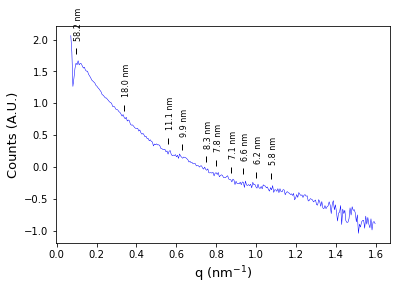

In [15]:
"""
Func: readrad
Input: (file directory:str, filename:str)
Output: None
Returns: q_values:list, counts:list
"""
q_values, counts = readrad('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/saxs_waxs/saxs/2024-07-31/rad'
                           , '6x_sc_saxs_1D')

###########################################################################################################################
"""
Func: plotrad
Input: (q values:list, counts:list, cutoff_x:float)
Output: Radial SAXS plot with labeled notable peaks
Returns: None
"""
plotrad(q_values, counts, cutoff_x=1.6)

###########################################################################################################################
"""
Func: dopeaks
Input: (q values:list, counts:list)
Output: Adds labeled peaks of interest to SAXS plot
Returns: None
"""
dopeaks(q_values, counts, height=-0.3)

###########################################################################################################################
"""
Func: save
Input: (Folder Directory:str, Desired Filename:str) - WILL ADD .png AUTOMATICALLY
Output: High-res png to prespecified folder
Returns: None
"""
save('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/saxs_waxs/plots/24-07-31', '6x_sc_saxs_1D')

## Azimuthal SAXS/WAXS Analysis

<ipython-input-20-70d48bc26cc0>:15: RuntimeWarning: invalid value encountered in log10
  return df[:,0], np.log10(df[:,1])


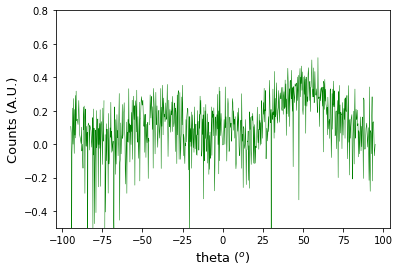

In [21]:
"""
Func: readazi
Input: (file directory:str, filename:str)
Output: None
Returns: theta values:list, counts:list
"""
theta, counts = readazi('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/saxs_waxs/saxs/ca0.3'
                        ,'Ca0.3_Azi_0.58-0.66')

###########################################################################################################################
"""
Func: plotazi
Input: (theta values:list, counts:list)
Output: Azimuthal SAXS/WAXS plot
Returns: None
"""
plotazi(theta, counts)

###########################################################################################################################
save('C:/Users/ajfar/Desktop/McGill/Research/Harrington_Singh_2024/saxs_waxs/plots/24-06-13', 'ca0.3_Azi_1.07-1.15')